In [1]:
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.utils import resample

df = pd.read_csv("all_viruses_v2.csv")
df = resample(
    df,
    replace=False,
    n_samples=5000,  # Adjust the desired size accordingly
    random_state=42
).reset_index(drop=True)

In [2]:
df

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,1802191G:4,11060,1802191G,322,R,25758647,101410,9606,2,0,...,0.253440,-0.054703,-0.107563,0.134034,-0.637219,-0.162080,0.019305,0.007423,-0.088826,0.086144
1,AVV62528.1:2,1335626,AVV62528.1,23,V,33580175,"1414002,1445067,1447054,1447189,1453217,146430...",9606,"2,0,0,0,0,1,0,1,0,1,1,0","4,3,3,3,3,2,3,5,3,2,5,3",...,-0.134029,0.170800,-0.034534,-0.014796,-1.427791,-0.373679,0.342157,0.108768,0.022009,0.438011
2,P04664.1:2,387147,P04664.1,63,N,7907197,43396,10000000,1,0,...,0.054698,0.050047,0.032328,0.059747,-1.410822,-0.148060,0.006109,0.037935,-0.033530,0.325288
3,AVV62532.1:3,1335626,AVV62532.1,70,P,33580175,"1415087,1431596,1450532",9606,"1,1,0","5,2,3",...,0.006032,-0.006412,-0.013110,0.078516,-0.376308,-0.116565,-0.045770,0.169865,0.015900,0.164597
4,Q32ZE1.1:139,64320,Q32ZE1.1,2363,M,34290707,"1639820,1642282",9606,"2,1","0,1",...,0.162415,-0.131412,0.002491,-0.114282,-1.066111,-0.270772,-0.216460,-0.042336,-0.143749,0.030633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,QLJ58334.1:3,11089,QLJ58334.1,33,Q,34290707,"1640521,1640535",9606,"1,3","1,0",...,0.029241,0.104362,-0.015846,0.046372,-1.725452,0.105030,-0.059988,0.133097,-0.058139,0.178787
4996,NP_828857.1:1,227984,NP_828857.1,103,L,34143766,"1667951,1691068,1687547,1653847,1655781,170544...",9606,"2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0","0,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2",...,-0.033840,-0.012273,0.024326,0.106536,-0.584922,-0.052751,0.107107,0.011512,-0.113937,-0.004184
4997,AAP55696.1:2,31650,AAP55696.1,341,P,10092013,40036,9606,0,5,...,0.067478,-0.188705,-0.117948,-0.071127,-0.655211,-0.021679,0.102668,0.045259,0.008659,0.173507
4998,CAA25008.1:12,11824,CAA25008.1,455,T,1689371,78895,9986,3,0,...,0.664487,-0.247076,-0.005394,0.044484,-0.065329,-0.078010,0.110370,0.099166,-0.102281,0.074428


## Preprocessing

In [3]:

def print_missing_values(dataframe):
    # Count the number of missing values in each column
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)

    # Filter out columns with no missing values
    missing_values = missing_values[missing_values > 0]

    # Print the table of missing values in descending order
    print("Number of missing values in each column:")
    print(missing_values)

    # Plot a bar graph of missing values (only for columns with missing values)
    if not missing_values.empty:
        print("there are missing values")
    else:
        print("No columns with missing values.")


print_missing_values(df)

Number of missing values in each column:
feat_esm1b_633    56
feat_esm1b_876    56
feat_esm1b_854    56
feat_esm1b_853    56
feat_esm1b_852    56
                  ..
feat_esm1b_422    56
feat_esm1b_421    56
feat_esm1b_420    56
feat_esm1b_419    56
feat_esm1b_418    56
Length: 1280, dtype: int64
there are missing values


In [4]:
import pandas as pd

# Drop rows with missing values
df.dropna(inplace=True)

In [5]:
import pandas as pd

# Drop columns starting with "Info_" except "Info_cluster"
columns_to_drop = df.filter(regex='^Info_(?!cluster)').columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated DataFrame
print(df)


      Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
0                8      1      0.179011      0.203662      0.024505   
1              589     -1      0.150422     -0.013744      0.000510   
2                1      1      0.278986      0.172278     -0.123253   
3              575     -1      0.041575      0.164590     -0.117662   
4                8     -1      0.384218     -0.133514      0.114821   
...            ...    ...           ...           ...           ...   
4995             8     -1     -0.177775      0.244810     -0.086172   
4996           566     -1     -0.038724      0.123018      0.256502   
4997            28     -1     -0.002630     -0.109005      0.431068   
4998           216      1      0.414099      0.584960      0.029198   
4999            42      1     -0.067634      0.202856      0.140018   

      feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
0        -0.010472      0.174965     -0.043751     -0.046647     -0.0

In [6]:
def is_datatype_consistent(dataframe):
    consistent = True
    for col in dataframe.columns:
        unique_dtypes = dataframe[col].apply(lambda x: type(x)).nunique()
        if unique_dtypes > 1:
            print(f"Inconsistent data types found in column '{col}'.")
            consistent = False
    if consistent:
        print("Data types are consistent across the dataset.")
    return consistent

is_datatype_consistent(df)

Data types are consistent across the dataset.


True

Standardizing the dataset

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Create a mask to identify non-class columns
mask = df.columns != "Class"

df.loc[:, mask] = scaler.fit_transform(df.loc[:, mask])

In [8]:
X = df.drop(columns="Class")
y = df["Class"]

## Feature selection

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Set the random seed
np.random.seed(42)

# Convert X and y to numpy arrays
X_array = X.values
y_array = y.values

# Initialize a random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Initialize Boruta feature selection
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# Perform feature selection
boruta_selector.fit(X_array, y_array)

# Get the selected features
selected_features = X.columns[boruta_selector.support_].to_list()

# Print the selected features
print("Selected Features:")
print(selected_features)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1281
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	115
Tentative: 	226
Rejected: 	940
Iteration: 	9 / 100
Confirmed: 	115
Tentative: 	226
Rejected: 	940
Iteration: 	10 / 100
Confirmed: 	115
Tentative: 	226
Rejected: 	940
Iteration: 	11 / 100
Confirmed: 	115
Tentative: 	226
Rejected: 	940
Iteration: 	12 / 100
Confirmed: 	120
Tentative: 	155
Rejected: 	1006
Iteration: 	13 / 100
Confirmed: 	120
Tentative: 	155
Rejected: 	1006
Iteration: 	14 / 100
Confirmed: 	120
Tentative: 	155
Rejected: 	1006
Iteration: 	15 / 100
Confirmed: 	120
Tentative: 	155
Rejected: 	1006
Iterat

In [10]:
selected_features.append("Class")
selected_features

['Info_cluster',
 'feat_esm1b_15',
 'feat_esm1b_38',
 'feat_esm1b_46',
 'feat_esm1b_69',
 'feat_esm1b_70',
 'feat_esm1b_76',
 'feat_esm1b_87',
 'feat_esm1b_89',
 'feat_esm1b_125',
 'feat_esm1b_128',
 'feat_esm1b_141',
 'feat_esm1b_162',
 'feat_esm1b_179',
 'feat_esm1b_188',
 'feat_esm1b_197',
 'feat_esm1b_213',
 'feat_esm1b_217',
 'feat_esm1b_224',
 'feat_esm1b_252',
 'feat_esm1b_254',
 'feat_esm1b_255',
 'feat_esm1b_265',
 'feat_esm1b_267',
 'feat_esm1b_279',
 'feat_esm1b_290',
 'feat_esm1b_302',
 'feat_esm1b_303',
 'feat_esm1b_304',
 'feat_esm1b_308',
 'feat_esm1b_313',
 'feat_esm1b_324',
 'feat_esm1b_330',
 'feat_esm1b_331',
 'feat_esm1b_343',
 'feat_esm1b_344',
 'feat_esm1b_358',
 'feat_esm1b_367',
 'feat_esm1b_392',
 'feat_esm1b_397',
 'feat_esm1b_413',
 'feat_esm1b_423',
 'feat_esm1b_434',
 'feat_esm1b_447',
 'feat_esm1b_450',
 'feat_esm1b_455',
 'feat_esm1b_457',
 'feat_esm1b_459',
 'feat_esm1b_472',
 'feat_esm1b_474',
 'feat_esm1b_476',
 'feat_esm1b_484',
 'feat_esm1b_487',
 'f

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing dataset (50%)
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

# Printing the sizes of each split
print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))


Training data size: 3708
Testing data size: 1236


Import lentivirus dataset and split data into training, testing, and hold-out set

In [12]:
lentivirus = pd.read_csv("lentivirus_data.csv")
lentivirus = lentivirus[selected_features]

In [13]:
lentivirus

,Info_cluster,feat_esm1b_15,feat_esm1b_38,feat_esm1b_46,feat_esm1b_69,feat_esm1b_70,feat_esm1b_76,feat_esm1b_87,feat_esm1b_89,feat_esm1b_125,...,feat_esm1b_1208,feat_esm1b_1216,feat_esm1b_1223,feat_esm1b_1231,feat_esm1b_1233,feat_esm1b_1237,feat_esm1b_1239,feat_esm1b_1240,feat_esm1b_1274,Class
0,-0.540395,-0.216428,-0.302226,-1.438174,-0.698117,-0.570326,-0.004256,1.738732,1.228630,0.143393,...,-0.681933,-1.452177,0.895137,-0.499066,0.692009,-0.030795,0.250912,-0.965501,-0.055663,1
1,-0.237438,-0.134951,-0.285615,1.767132,-1.477632,0.858826,-0.641164,-0.031943,0.141120,-0.067709,...,-0.899429,-0.640552,1.878700,-1.881437,1.903750,2.271861,-0.760145,-0.303356,-1.140141,1
2,1.249803,0.406335,-0.738025,0.617204,-0.066081,1.611213,0.390279,0.009539,0.603131,0.650429,...,-0.774447,0.447515,0.547603,-0.071099,0.290806,0.385756,-0.394139,-0.811954,-1.022798,-1
3,-0.540395,0.992717,1.089837,-1.259625,-0.266833,1.028665,0.964597,1.021837,-0.814386,-0.683253,...,0.642049,-0.690860,0.928036,-1.243663,-0.076666,1.470194,-0.549170,0.291507,1.226694,1
4,-0.237438,0.489113,-0.064441,1.825180,-0.649976,0.463370,-0.444029,-0.113687,0.279925,0.305693,...,0.295531,-0.196377,1.951778,0.059358,-0.521479,0.230404,-0.813507,-0.276400,-0.212514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.237438,-0.456892,-0.093494,-0.758069,0.645052,-0.495986,0.997834,-0.174821,-0.386930,1.063937,...,0.257233,-0.007098,0.618666,-0.631028,-0.062281,0.217803,-0.061111,-1.324875,-0.127970,1
1005,1.249803,1.246963,0.219468,0.010194,-0.251273,1.682956,0.272542,-1.015553,-0.205831,0.945232,...,-0.966267,-1.124424,-0.039834,0.898539,0.501087,1.055738,-0.048068,-0.652693,-0.811461,-1
1006,-0.540395,0.290393,1.111766,-0.360445,0.907644,1.123556,-0.632260,0.458548,0.578723,-0.077712,...,0.291996,0.748973,-0.117876,0.329348,0.231927,0.003698,0.655237,0.094564,-0.254380,1
1007,2.489171,1.131738,0.668270,1.844005,-0.232214,1.297577,-2.172808,0.705767,-0.347523,0.677735,...,1.042847,-1.196159,-1.710789,-0.719528,-0.988258,-0.337754,-1.790046,0.242890,-0.691822,1


In [14]:
mask = lentivirus.columns != "Class"
lentivirus.loc[:, mask] = scaler.fit_transform(lentivirus.loc[:, mask])

In [15]:
# Drop rows with missing values
lentivirus.dropna(inplace=True)

# Print the updated DataFrame
print(lentivirus)

      Info_cluster  feat_esm1b_15  feat_esm1b_38  feat_esm1b_46  \
0        -0.545448      -0.230647      -0.286184      -1.485622   
1        -0.236353      -0.147458      -0.269390       1.806092   
2         1.281020       0.405205      -0.726787       0.625164   
3        -0.545448       1.003910       1.121221      -1.302260   
4        -0.236353       0.489723      -0.045779       1.865705   
...            ...            ...            ...            ...   
1004     -0.236353      -0.476164      -0.075152      -0.787184   
1005      1.281020       1.263499       0.241259       0.001790   
1006     -0.545448       0.286826       1.143392      -0.378840   
1007      2.545498       1.145853       0.695008       1.885037   
1008     -0.236353      -0.436224      -0.867172      -0.465174   

      feat_esm1b_69  feat_esm1b_70  feat_esm1b_76  feat_esm1b_87  \
0         -0.725927      -0.587752       0.012327       1.752067   
1         -1.503250       0.848221      -0.622604      -0.0

In [16]:
# Splitting the dataset into training and remaining data (50%)
lenti_train, remaining_data = train_test_split(lentivirus, test_size=0.5, random_state=42)

# Splitting the remaining data into testing and hold-out (50% of remaining data each)
lenti_test, holdout_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

# Printing the sizes of each split
print("Training data size:", len(lenti_train))
print("Testing data size:", len(lenti_test))
print("Hold-out data size:", len(holdout_data))


Training data size: 504
Testing data size: 252
Hold-out data size: 253


In [17]:
train_data

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
4732,-0.824814,-1,-0.035782,0.979575,-0.766056,0.444185,1.394861,0.612468,-1.114174,0.080074,...,0.159696,0.183484,-0.860851,-0.056895,-0.577265,0.586591,0.007725,-0.795856,0.152716,0.443079
1077,-0.824814,1,-1.528182,-0.165631,-1.222852,0.070939,1.653314,0.594089,0.065991,0.164048,...,-0.176838,-1.512071,1.032958,-2.108587,1.908715,1.978000,0.917692,-0.128516,-1.610395,-2.122749
3292,-0.828945,1,0.713430,-0.293336,-0.886169,-0.004658,0.739857,0.866343,0.914079,-0.210403,...,-0.571137,0.632350,1.311923,0.210717,-1.107030,-0.748033,-0.465388,0.346508,-0.731403,-0.977556
2618,0.067480,-1,0.793059,1.376617,-2.057538,1.752255,1.681570,-0.512685,0.806652,-0.381660,...,1.414444,-0.055830,0.927312,-0.712120,1.435082,-0.996910,0.117121,-0.560064,-0.591450,0.415383
4245,-0.824814,-1,-0.443476,-1.256478,0.717991,-1.459524,-0.578907,-0.175691,-0.595183,-0.141326,...,0.588146,-0.496221,0.551593,-0.538332,0.657561,0.993569,0.034470,-1.340179,-0.655143,0.068784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,-0.742194,1,-0.959265,0.741581,0.837996,-0.191848,-0.469900,0.583160,1.854512,-1.134049,...,-0.518591,-1.457706,0.963332,0.025562,0.221848,-0.762170,1.580194,0.620111,0.618390,0.037759
468,-0.754587,-1,-0.081655,0.627396,0.559133,-0.918488,-1.108461,-0.577984,0.346922,0.178223,...,1.096852,-1.280123,1.638585,0.127432,0.034772,-0.677343,-0.987537,-0.098453,1.470712,1.368686
3126,-0.630657,1,0.234470,2.198867,-1.087524,-0.991205,-0.414148,-1.414801,0.240022,-0.318511,...,3.539059,-2.401729,0.633103,-0.057441,0.567661,-0.863206,-1.531303,-0.784238,0.606125,0.883982
3819,-0.647181,1,1.398936,1.871653,0.017419,-1.943764,0.321617,0.370039,-0.254844,0.001111,...,0.319585,-0.579820,0.651883,0.194037,0.070741,0.655054,0.323026,1.028218,-0.230643,-1.366489


Concatenate lentivirus training dataset and "all viruses" dataset

In [18]:
# Concatenate the train_data and lenti_train DataFrames
final_train = pd.concat([train_data[selected_features], lenti_train])

## Modelling

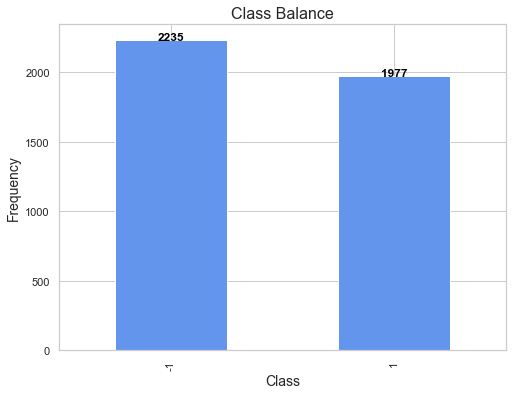

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

class_counts = final_train["Class"].value_counts()

# Set seaborn aesthetic parameters
sns.set(style="whitegrid")

# Plot the class balance using a bar plot
ax = class_counts.plot(kind='bar', figsize=(8, 6), color='cornflowerblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Class Balance', fontsize=16)

# Annotate the exact number on each bar
for i, v in enumerate(class_counts):
    ax.text(i, v + 0.2, str(v), color='black', ha='center', fontweight='bold')

plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef

# Adjust class weights as needed
class_weights = {1: 50, -1: 50}

X_train =final_train.drop(columns="Class")
y_train = final_train["Class"]
X_test = lenti_test.drop(columns="Class")
y_test = lenti_test["Class"]

# Train the Random Forest model
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model = LogisticRegression(class_weight=class_weights, random_state=42)
lr_model.fit(X_train, y_train)

# Train the Support Vector Machine model
svm_model = SVC(class_weight=class_weights, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Calculate the MCC value for each model
rf_mcc = matthews_corrcoef(y_test, rf_predictions)
lr_mcc = matthews_corrcoef(y_test, lr_predictions)
svm_mcc = matthews_corrcoef(y_test, svm_predictions)

# Print the MCC values
print("Random Forest MCC:", rf_mcc)
print("Logistic Regression MCC:", lr_mcc)
print("Support Vector Machine MCC:", svm_mcc)


Random Forest MCC: 0.6562955635915949
Logistic Regression MCC: 0.31051210826017955
Support Vector Machine MCC: 0.8072529588964096


Save holdout dataset and combine training and testing set for lentivirus for future implementations

In [21]:
lentivirus_holdout = holdout_data.to_csv("lentivirus_holdout.csv", index=False)


In [22]:
# Concatenate lenti_test and lenti_train
combined_dataset = pd.concat([lenti_test, lenti_train])

# Save the combined dataset to a CSV file
combined_dataset.to_csv("lentivirus_data.csv", index=False)

# Data Mining Pipeline

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef

def run_pipeline(df, lentivirus_data, class_weights):
    # Drop rows with missing values
    df.dropna(inplace=True)

    # Drop columns starting with "Info_" except "Info_cluster"
    columns_to_drop = df.filter(regex='^Info_(?!cluster)').columns
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    selected_features = ['Info_cluster','feat_esm1b_15','feat_esm1b_38','feat_esm1b_46','feat_esm1b_69','feat_esm1b_70',
         'feat_esm1b_76',
         'feat_esm1b_87',
         'feat_esm1b_89',
         'feat_esm1b_125',
         'feat_esm1b_128',
         'feat_esm1b_141',
         'feat_esm1b_162',
         'feat_esm1b_179',
         'feat_esm1b_188',
         'feat_esm1b_197',
         'feat_esm1b_213',
         'feat_esm1b_217',
         'feat_esm1b_224',
         'feat_esm1b_252',
         'feat_esm1b_254',
         'feat_esm1b_255',
         'feat_esm1b_265',
         'feat_esm1b_267',
         'feat_esm1b_279',
         'feat_esm1b_290',
         'feat_esm1b_302',
         'feat_esm1b_303',
         'feat_esm1b_304',
         'feat_esm1b_308',
         'feat_esm1b_313',
         'feat_esm1b_324',
         'feat_esm1b_330',
         'feat_esm1b_331',
         'feat_esm1b_343',
         'feat_esm1b_344',
         'feat_esm1b_358',
         'feat_esm1b_367',
         'feat_esm1b_392',
         'feat_esm1b_397',
         'feat_esm1b_413',
         'feat_esm1b_423',
         'feat_esm1b_434',
         'feat_esm1b_447',
         'feat_esm1b_450',
         'feat_esm1b_455',
         'feat_esm1b_457',
         'feat_esm1b_459',
         'feat_esm1b_472',
         'feat_esm1b_474',
         'feat_esm1b_476',
         'feat_esm1b_484',
         'feat_esm1b_487',
         'feat_esm1b_494',
         'feat_esm1b_500',
         'feat_esm1b_509',
         'feat_esm1b_526',
         'feat_esm1b_535',
         'feat_esm1b_541',
         'feat_esm1b_564',
         'feat_esm1b_570',
         'feat_esm1b_600',
         'feat_esm1b_621',
         'feat_esm1b_628',
         'feat_esm1b_639',
         'feat_esm1b_643',
         'feat_esm1b_646',
         'feat_esm1b_659',
         'feat_esm1b_665',
         'feat_esm1b_668',
         'feat_esm1b_669',
         'feat_esm1b_670',
         'feat_esm1b_671',
         'feat_esm1b_679',
         'feat_esm1b_684',
         'feat_esm1b_699',
         'feat_esm1b_711',
         'feat_esm1b_725',
         'feat_esm1b_728',
         'feat_esm1b_733',
         'feat_esm1b_741',
         'feat_esm1b_757',
         'feat_esm1b_771',
         'feat_esm1b_777',
         'feat_esm1b_785',
         'feat_esm1b_789',
         'feat_esm1b_795',
         'feat_esm1b_801',
         'feat_esm1b_805',
         'feat_esm1b_810',
         'feat_esm1b_847',
         'feat_esm1b_854',
         'feat_esm1b_874',
         'feat_esm1b_877',
         'feat_esm1b_882',
         'feat_esm1b_884',
         'feat_esm1b_898',
         'feat_esm1b_904',
         'feat_esm1b_909',
         'feat_esm1b_927',
         'feat_esm1b_928',
         'feat_esm1b_929',
         'feat_esm1b_933',
         'feat_esm1b_936',
         'feat_esm1b_942',
         'feat_esm1b_960',
         'feat_esm1b_966',
         'feat_esm1b_1015',
         'feat_esm1b_1043',
         'feat_esm1b_1050',
         'feat_esm1b_1056',
         'feat_esm1b_1103',
         'feat_esm1b_1109',
         'feat_esm1b_1110',
         'feat_esm1b_1125',
         'feat_esm1b_1132',
         'feat_esm1b_1148',
         'feat_esm1b_1153',
         'feat_esm1b_1156',
         'feat_esm1b_1159',
         'feat_esm1b_1166',
         'feat_esm1b_1167',
         'feat_esm1b_1180',
         'feat_esm1b_1183',
         'feat_esm1b_1186',
         'feat_esm1b_1208',
         'feat_esm1b_1216',
         'feat_esm1b_1223',
         'feat_esm1b_1231',
         'feat_esm1b_1233',
         'feat_esm1b_1237',
         'feat_esm1b_1239',
         'feat_esm1b_1240',
         'feat_esm1b_1274',
         'Class']

    df = df[selected_features]
    # Standardize the dataset
    scaler = StandardScaler()
    mask = df.columns != "Class"
    df.loc[:, mask] = scaler.fit_transform(df.loc[:, mask])

    lentivirus = lentivirus_data[selected_features]
    mask = lentivirus.columns != "Class"
    lentivirus.loc[:, mask] = scaler.transform(lentivirus.loc[:, mask])

 
    lentivirus_train, lentivirus_test = train_test_split(lentivirus, test_size=0.25, random_state=42)

    # Concatenate lentivirus train data with the training data
    final_train = pd.concat([df, lentivirus_train], ignore_index=True)

    # Define the target variables for training and testing
    y_train = final_train["Class"]
    y_test = lentivirus_test["Class"]

    # Remove the "Class" column from the datasets
    X_train = final_train.drop(columns="Class")
    X_test = lentivirus_test.drop(columns="Class")

    # Train the models
    rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    lr_model = LogisticRegression(class_weight=class_weights, random_state=42)
    svm_model = SVC(class_weight=class_weights, random_state=42)

    rf_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)

    # Make predictions on the testing set
    rf_predictions = rf_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)

    # Calculate the MCC value for each model
    rf_mcc = matthews_corrcoef(y_test, rf_predictions)
    lr_mcc = matthews_corrcoef(y_test, lr_predictions)
    svm_mcc = matthews_corrcoef(y_test, svm_predictions)

    # Return the MCC values
    return rf_mcc, lr_mcc, svm_mcc




## Testing pipeline

In [25]:
df = pd.read_csv("all_viruses_v2.csv")

In [26]:
# Usage example
df = resample(
    df,
    replace=False,
    n_samples=8000,  # Adjust the desired size accordingly
    random_state=42
).reset_index(drop=True)
lentivirus_data = pd.read_csv("lentivirus_data.csv")

class_weights = {1: 50, -1: 50}

rf_mcc, lr_mcc, svm_mcc = run_pipeline(df, lentivirus_data, class_weights)

print("Random Forest MCC:", rf_mcc)
print("Logistic Regression MCC:", lr_mcc)
print("Support Vector Machine MCC:", svm_mcc)


Random Forest MCC: 0.7104913482599073
Logistic Regression MCC: 0.517376733509516
Support Vector Machine MCC: 0.4488819027605528
